**Basic Text Processing**


**Warmup: computing word frequencies**


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from collections import Counter
from collections import defaultdict

In [ ]:
 !unzip '/content/drive/My Drive/DAT450 DIT245/a1_data.zip'

Archive:  /content/drive/My Drive/DAT450 DIT245/a1_data.zip
replace a1_data/europarl.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: a1_data/europarl.txt    
replace a1_data/wikipedia.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: a1_data/wikipedia.txt   y

replace a1_data/books.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename:   inflating: a1_data/books.txt       


In [ ]:
#Computing word frequency for file using Counter 
def freqs_counter(file, encoding):
	freqs = Counter()
	with open(file,encoding=encoding) as f:
		for line in f:
			tokens = line.lower().split()
			for token in tokens:
				freqs[token] += 1
	return freqs


In [ ]:
book_freqs_counter=freqs_counter('a1_data/books.txt', "ISO-8859-1")
europarl_freqs_counter=freqs_counter('a1_data/europarl.txt', "UTF-8")
wikipedia_freqs_counter=freqs_counter('a1_data/wikipedia.txt', "UTF-8")

In [ ]:
print('The most frequent in book dataset')
print(book_freqs_counter.most_common(3))

print('The most frequent in European Parliament dataset')
print(europarl_freqs_counter.most_common(3))

print('The most frequent in wikipedia dataset')
print(wikipedia_freqs_counter.most_common(3))

The most frequent in book dataset
[('the', 2425678), (',', 2064433), ('.', 1958494)]
The most frequent in European Parliament dataset
[('the', 3003965), (',', 2115604), ('.', 1536632)]
The most frequent in wikipedia dataset
[('the', 3158463), (',', 2566261), ('.', 1956600)]


In [ ]:
def freqs_dict_counter(file, encoding):
  freqs_dict = defaultdict(Counter)
  with open(file, encoding=encoding) as f:
    for line in f:
    	tokens = line.lower().split()
    	for t1, t2 in zip(tokens, tokens[1:]):
    	    freqs_dict[t1][t2] += 1
  return freqs_dict

In [ ]:
book_freqs_dict_counter=freqs_dict_counter('a1_data/books.txt', "ISO-8859-1")
europarl_freqs_dict_counter=freqs_dict_counter('a1_data/europarl.txt', "UTF-8")
wikipedia_freqs_dict_counter=freqs_dict_counter('a1_data/wikipedia.txt', "UTF-8")

In [ ]:
print('the words that most frequently follow the word "red" in book dataset ')
print(book_freqs_dict_counter['red'].most_common(10))

print('the words that most frequently follow the word "red" in European Parliament dataset ')
print(europarl_freqs_dict_counter['red'].most_common(10))

print('the words that most frequently follow the word "red" in wikipedia dataset ')
print(wikipedia_freqs_dict_counter['red'].most_common(10))

the words that most frequently follow the word "red" in book dataset 
[('sox', 198), ('herrings', 175), (',', 132), ('army', 126), ('and', 104), ('riding', 83), ('wine', 75), ('october', 69), ('cross', 65), ('"', 65)]
the words that most frequently follow the word "red" in European Parliament dataset 
[('tape', 856), ('cross', 214), ('card', 54), ('lines', 37), ('and', 26), ('army', 26), ('light', 25), ('line', 23), (',', 22), ('.', 18)]
the words that most frequently follow the word "red" in wikipedia dataset 
[(',', 532), ('sox', 495), ('and', 467), ('-', 454), ('army', 404), ('cross', 278), ('.', 213), ('wings', 208), ('sea', 177), ('river', 166)]


**Investigating the word frequency distribution**

In [ ]:
import numpy as np
ranking=np.arange(start=1, stop=101)

In [ ]:
def get_frequency(counter):
  frequency = [x for (_, x) in counter.most_common(100)]
  return frequency

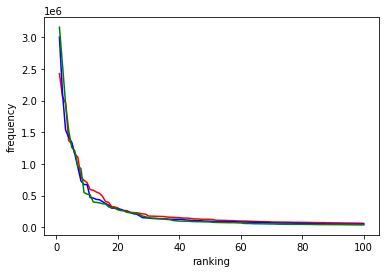

In [ ]:
import matplotlib.pyplot as plt
plt.plot(ranking,get_frequency(book_freqs_counter),'r',ranking,get_frequency(europarl_freqs_counter),'b',ranking,get_frequency(wikipedia_freqs_counter),'g')
plt.ylabel('frequency')
plt.xlabel('ranking')
plt.show()

*Reflection*: What consequences do you think this distribution has for machine 
learning systems that work with language?


The words which are present in most documents are usually stop words such as 'a', 'the' etc. Such words confue an ML system since they increase similarity between unrelated scenarios.
The words that are present in only few documents should also be ignored as they increase the feature space and making document vectors more sparse and therefore affected ML system result. Such words might be misspelled in many cases.


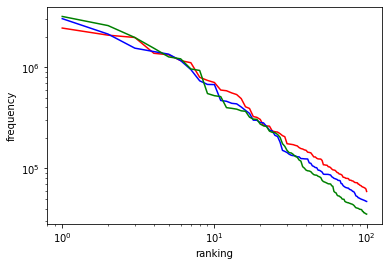

In [ ]:

plt.loglog(ranking,get_frequency(book_freqs_counter),'r',ranking,get_frequency(europarl_freqs_counter),'b',ranking,get_frequency(wikipedia_freqs_counter),'g')
plt.ylabel('frequency')
plt.xlabel('ranking')
plt.show()

Read about *Zipf's law* and discuss how well you think your observed distribution corresponds to this model.

In Zipf's law, the frequency of any word is inversely proportional to its ranking number. The word number n has a frequency proportional to 1/n. 
From the figure above, it is clear all three corporas confirm Zipf's Law. But slight deviations exist  from the linear relationship. So we can say that Zipf's law holds for our corporas

**Comparing corpora**

In [ ]:
def find_typical(file, encoding):
  freqs = freqs_counter(file, encoding)
  freqs=sorted(freqs.items(), key=lambda pair: pair[1], reverse=True)
  return freqs[:20]  
 

In [ ]:
book_typical_words=find_typical('a1_data/books.txt', "ISO-8859-1")

In [ ]:
european_typical_words=find_typical('a1_data/europarl.txt', "UTF-8")

In [ ]:
book_typical_words

[('the', 2425678),
 (',', 2064433),
 ('.', 1958494),
 ('and', 1367843),
 ('of', 1321821),
 ('to', 1159024),
 ('a', 1103939),
 ('is', 792900),
 ('in', 739009),
 ('i', 704436),
 ('this', 593632),
 ('it', 584199),
 ('that', 555809),
 ('book', 535757),
 ('"', 488690),
 ('for', 405872),
 ("'s", 390909),
 ('as', 325125),
 ('with', 319267),
 ('you', 304635)]

In [ ]:
european_typical_words

[('the', 3003965),
 (',', 2115604),
 ('.', 1536632),
 ('of', 1422333),
 ('to', 1341441),
 ('and', 1158234),
 ('in', 945160),
 ('that', 732156),
 ('a', 674231),
 ('is', 671969),
 ('for', 468309),
 ('we', 460034),
 ('i', 439114),
 ('this', 433770),
 ('on', 403992),
 ('it', 373894),
 ('be', 349411),
 ('not', 299586),
 ('are', 298932),
 ('as', 283907)]

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

def display_wordcloud(file ,encoding):
  with open(file,encoding=encoding) as f:
    book_data = " ".join(line.strip() for line in f) 
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(book_data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    

    plt.imshow(wordcloud)
    plt.show()

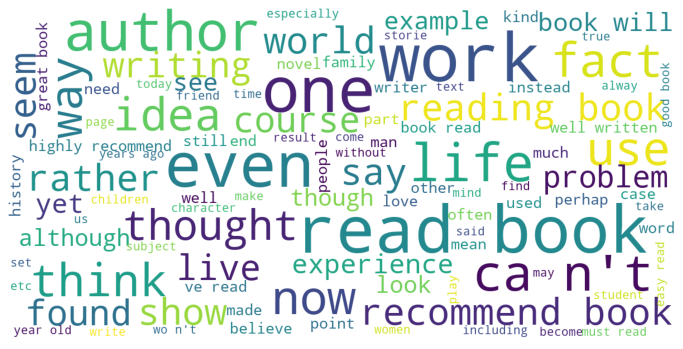

In [ ]:
display_wordcloud('a1_data/books.txt', "ISO-8859-1")

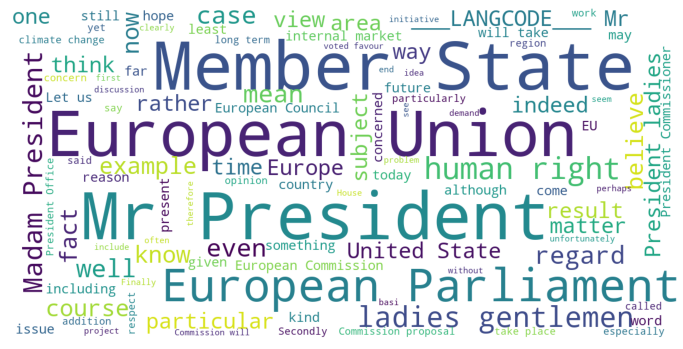

In [ ]:
display_wordcloud('a1_data/europarl.txt', "UTF-8")

#Side show: preprocessing text for machine learning#

In [ ]:
from collections import Counter
from collections import defaultdict
import numpy as np
class Vocab:
    def __init__(self, vocab_size:int, batch_size:int):
        self.vocab_size = vocab_size
        self.batch_size = batch_size
    def build_vocab(self, docs):
        """
        Get vocabulary of most common words
        """
        words = [word for word, _ in self.__get_word_freq(docs).most_common(self.vocab_size)]
        vocab = {}
        for i in range(self.vocab_size):
            vocab[words[i]] = i
        return vocab
    
    def doc_to_vec(self, doc:str, vocab):
        """
        Convert given document to a vector
        """
        vec = np.zeros(self.vocab_size)
        for word in doc.split():
            if word in vocab:
                vec[vocab[word]] = 1
        return vec
    def get_batches(self, docs):
        """
        Vectorizes list of documents and divides the resulting matrix into 'num_batches' matrices.
        """
        vocab = self.build_vocab(docs)
        matrix = np.array([self.doc_to_vec(doc, vocab) for doc in docs])
        return np.array_split(matrix, self.batch_size)
    def __get_word_freq(self, docs):
        """
        Returns most frequent words with their frequency as list of tuples. 
        """
        freqs = Counter()
        for line in docs:
            tokens = line.lower().split()
            for token in tokens:
                freqs[token] += 1
        return freqs

if __name__ == "__main__":
    f = open('a1_data/books.txt', 'r', encoding="ISO-8859-1")
    docs = f.readlines()
    vocab = Vocab(200, 3)
    vb = vocab.build_vocab(docs)
    print(vocab.get_batches(docs))

[array([[1., 1., 1., ..., 0., 0., 1.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       ...,
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.]]), array([[1., 0., 1., ..., 0., 0., 1.],
       [1., 1., 1., ..., 1., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       ...,
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 1.]]), array([[1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       ...,
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.]])]


#Trying out an NLP toolkit#

In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')

##Processing a text##

In [ ]:
example = 'ASDF Inc. bought two companies last week. One of them was founded by Jane XYZ in 2012 in Germany.'
result = nlp(example)

##Visualizing the results##

In [ ]:
from spacy import displacy
displacy.render(result, style='ent', jupyter=True)

In [ ]:
displacy.render(result, style='dep', jupyter=True, options={'color': '#A7086B'} )

##Accessing the results in your code##

In [ ]:
import pandas as pd
df_token = pd.DataFrame(columns=['token.text', 'token.pos_', 'token.lemma_','token.head','token.dep_'])
for token in result:
  new_row = {'token.text':token.text, 'token.pos_':token.pos_, 'token.lemma_':token.lemma_,'token.head':token.head,'token.dep_':token.dep_}
  df_token = df_token.append(new_row, ignore_index=True)
df_token

,token.text,token.pos_,token.lemma_,token.head,token.dep_
0,ASDF,PROPN,ASDF,Inc.,compound
1,Inc.,PROPN,Inc.,bought,nsubj
2,bought,VERB,buy,bought,ROOT
3,two,NUM,two,companies,nummod
4,companies,NOUN,company,bought,dobj
5,last,ADJ,last,week,amod
6,week,NOUN,week,bought,npadvmod
7,.,PUNCT,.,bought,punct
8,One,NUM,one,founded,nsubjpass
9,of,ADP,of,One,prep


In [ ]:

df_entity = pd.DataFrame(columns=['entity.text', 'entity.label_'])
for entity in result.ents:
  new_row = {'entity.text':entity.text, 'entity.label_':entity.label_}
  df_entity = df_entity.append(new_row, ignore_index=True)
df_entity

,entity.text,entity.label_
0,ASDF Inc.,ORG
1,two,CARDINAL
2,last week,DATE
3,One,CARDINAL
4,Jane XYZ,PERSON
5,2012,DATE
6,Germany,GPE


In [ ]:
#Using another example
example1='IBM is an American multinational technology and consulting company headquartered in Armonk, New York'
result1 = nlp(example1)

In [ ]:

displacy.render(result1, style='ent', jupyter=True)

* GPE :Countries, cities, states. --- Armonk , New York 
* NORP: Nationalities or religious or political groups ---American
* ORG: Companies, agencies, institutions, etc ---  IBM

In [ ]:
displacy.render(result1, style='dep', jupyter=True, options={'color': '#A7086B'} )

In [ ]:
import pandas as pd
df_token = pd.DataFrame(columns=['token.text', 'token.pos_', 'token.lemma_','token.head','token.dep_'])
for token in result1:
  new_row = {'token.text':token.text, 'token.pos_':token.pos_, 'token.lemma_':token.lemma_,'token.head':token.head,'token.dep_':token.dep_}
  df_token = df_token.append(new_row, ignore_index=True)
df_token

,token.text,token.pos_,token.lemma_,token.head,token.dep_
0,IBM,PROPN,IBM,is,nsubj
1,is,AUX,be,is,ROOT
2,an,DET,an,company,det
3,American,ADJ,american,company,amod
4,multinational,ADJ,multinational,company,amod
5,technology,NOUN,technology,company,nmod
6,and,CCONJ,and,technology,cc
7,consulting,VERB,consult,technology,conj
8,company,NOUN,company,is,attr
9,headquartered,VERB,headquarter,company,acl


In [ ]:
df_entity = pd.DataFrame(columns=['entity.text', 'entity.label_'])
for entity in result1.ents:
  new_row = {'entity.text':entity.text, 'entity.label_':entity.label_}
  df_entity = df_entity.append(new_row, ignore_index=True)
df_entity

,entity.text,entity.label_
0,IBM,ORG
1,American,NORP
2,Armonk,GPE
3,New York,GPE


##Additional questions##

*Which are the most frequent nouns in the book review corpus?*

In [ ]:
# We used first 10000 lines of file.
def frequent_nouns(file ,encoding):
  nouns = Counter()
  with open(file,encoding=encoding) as f:
    new_file = [next(f) for x in range(10000)]
    for line in new_file:
      result = nlp(line)
      for token in result:
        if token.pos_ == 'NOUN':
          nouns[token.lemma_] += 1
  return nouns


In [ ]:
frequent_nouns('a1_data/books.txt', "ISO-8859-1").most_common(5)

[('book', 21871),
 ('story', 3915),
 ('time', 3691),
 ('life', 3349),
 ('people', 2510)]

*Which are the most frequently mentioned countries in the Wikipedia corpus?*

In [ ]:
# We used first 10000 lines of file.
def frequent_countries(file ,encoding):
  countries = Counter()
  with open(file,encoding=encoding) as f:
    new_file = [next(f) for x in range(10000)]
    for line in new_file:
      result = nlp(line)
      for entity in result.ents:
        if entity.label_ == 'GPE':
          countries [entity.text] += 1
  return countries

In [ ]:
# the most frequently mentioned countries in the Wikipedia corpus. Since entity.label GPE is for  Countries, cities, states  there are some cities in most common list. Like New York
frequent_countries('a1_data/wikipedia.txt', "UTF-8").most_common(5)

[('the United States', 49),
 ('U.S.', 42),
 ('England', 42),
 ('New York', 41),
 ('Germany', 40)]

*What are the most frequent items that people drink in the European Parliament corpus?*

In [ ]:
# Joining lines that contain drink word.
drink_data = ''
with open('a1_data/europarl.txt', encoding = "UTF-8") as  european_parl:
  drink_data = ' '.join([line.strip() for line in european_parl if "drink" in line])


In [ ]:
drink_data

"In our countries , it is common for the lakes to be sources of drinking water or very sensitive natural areas , for example breeding grounds for birds . Mr\xa0President , even when my home country , Poland , was under Communist rule , encouraging children to drink was frowned upon . It saves people having to think how much more they can have , how much they have already had , how much they can drink generally . It is essential to give people access to healthcare , drinking water and sanitation . All these problems and even issues relating to obesity and binge drinking have links with a long-hours culture . However , the Commission , in proposing to accept a lower limit of 250 milligrams per litre in soft drinks , did not act on a whim of any individual official . For example , it could have compared the risk of eating lamb chops or other meat on the bone with smoking cigarettes , or drinking alcohol . People are saying that it might be possible to contract mad cow disease by drinking 

We used the relations between individual tokens to find the words which are related to word "drink". 

To get list of possible  token.dep_ between word "drink" and drink items we printed all tokens and token.dep_ for them and selected needed ones.

First we took "drink"  headwords and found its dependents then we took "drink" as dependent word and found its headwords

Since there are a lot of pronouns that related to "drink"  and spaCy introduces them as a novel symbol, `-PRON- ` we said  `token.pos_!='PRON'`

In [ ]:
drink_items = Counter()
for token in nlp(drink_data):
    if ('drink' in token.head.text )  and token.pos_!='PRON'  and token.dep_ in ['dobj','amod' ,'compound','attr','pobj','appos','nsubj']:
      drink_items[token.lemma_] += 1
    if ('drink' in token.text )and token.head.pos_!='PRON'  and token.head.dep_ in ['pobj','dobj' ,'compound','nsubj','conj','nsubjpass','nsubj']:
      drink_items[token.head.lemma_] += 1

In [ ]:
drink_items.most_common(5)

[('water', 432),
 ('alcoholic', 56),
 ('spirit', 40),
 ('driving', 34),
 ('milk', 33)]

It seems that the system has some limitation which cannot differentiate between verbs and adjectives when they are spelled the same. For instance in 'drunk driving' the word 'drunk' is an adjective but it is converted to 'drink' since the systems takes it as a verb